In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('13-car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.rename(columns={'vhigh':'buying','vhigh.1':'maint','2':'doors','2.1':'persons','small':'lug_boot','low':'safety','unacc':'class'},inplace=True)

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [12]:
df['doors']=df['doors'].replace('5more','5')
df['doors']=df['doors'].astype(int)

In [13]:
df['persons']=df['persons'].replace('more','5')
df['persons']=df['persons'].astype(int)

In [14]:
X=df.drop('class',axis=1)
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
categorical_cols=['buying','maint','lug_boot','safety']
numerical_cols=['doors','persons']
for col in categorical_cols:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64


In [20]:
ordinal_encoder=OrdinalEncoder(categories=[
        ['low','med','high','vhigh'],#buying için
        ['low','med','high','vhigh'],
        ['small','med','big'],
        ['low','med','high']
    
])

In [22]:
preprocessor=ColumnTransformer(transformers=[
    ('name_no_matter',ordinal_encoder,categorical_cols),
    
],remainder='passthrough')

In [23]:
X_train_transforms=preprocessor.fit_transform(X_train)
X_test_transforms=preprocessor.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier(max_depth=4)

In [39]:
dtc.fit(X_train_transforms,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_pred=dtc.predict(X_test_transforms)

In [41]:
from sklearn.metrics import classification_report
from sklearn import tree

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         acc       0.71      0.64      0.67        75
        good       1.00      0.35      0.51        26
       unacc       0.90      0.96      0.93       245
       vgood       0.00      0.00      0.00         0

    accuracy                           0.84       346
   macro avg       0.65      0.49      0.53       346
weighted avg       0.87      0.84      0.84       346



C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ömer faruk\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [43]:
name=categorical_cols+numerical_cols

[Text(0.25, 0.9, 'persons <= 3.0\ngini = 0.471\nsamples = 1381\nvalue = [316, 60, 950, 55]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 456\nvalue = [0, 0, 456, 0]'),
 Text(0.1875, 0.8, 'True  '),
 Text(0.375, 0.7, 'safety <= 0.5\ngini = 0.59\nsamples = 925\nvalue = [316, 60, 494, 55]'),
 Text(0.3125, 0.8, '  False'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]'),
 Text(0.5, 0.5, 'buying <= 1.5\ngini = 0.631\nsamples = 623\nvalue = [316, 60, 192, 55]'),
 Text(0.25, 0.3, 'maint <= 1.5\ngini = 0.635\nsamples = 323\nvalue = [174, 60, 34, 55]'),
 Text(0.125, 0.1, 'gini = 0.691\nsamples = 166\nvalue = [54, 60, 8, 44]'),
 Text(0.375, 0.1, 'gini = 0.383\nsamples = 157\nvalue = [120.0, 0.0, 26.0, 11.0]'),
 Text(0.75, 0.3, 'maint <= 1.5\ngini = 0.499\nsamples = 300\nvalue = [142.0, 0.0, 158.0, 0.0]'),
 Text(0.625, 0.1, 'gini = 0.354\nsamples = 152\nvalue = [117, 0, 35, 0]'),
 Text(0.875, 0.1, 'gini = 0.281\nsamples = 148\nvalue = [25.0, 0.0, 123.0, 0.0]')]

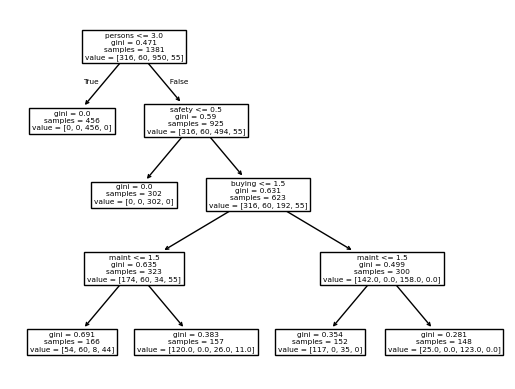

In [44]:
tree.plot_tree(dtc.fit(X_train_transforms,y_train),feature_names=name)